In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("../data/final_hybrid_data/final_dataset_selected_features.csv")

En Önemli 10 Özellik:
1. Destination Port (0.1193)
2. Init_Win_bytes_forward (0.0957)
3. Bwd Packet Length Min (0.0599)
4. Bwd Packets/s (0.0506)
5. Bwd Packet Length Mean (0.0451)
6. Flow Duration (0.0445)
7. Init_Win_bytes_backward (0.0439)
8. Fwd Packets/s (0.0425)
9. Flow IAT Max (0.0421)
10. Flow Bytes/s (0.0392)


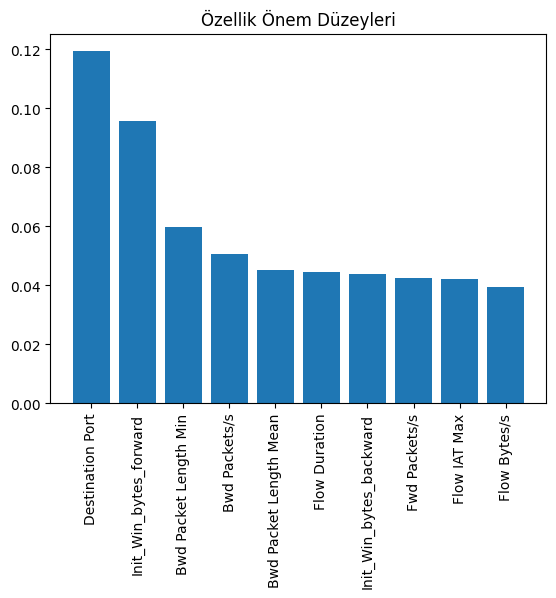

In [12]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df.drop('Label', axis=1)
y = df['Label']

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X, y)

importances = model.feature_importances_
indices = importances.argsort()[::-1]

print("En Önemli 10 Özellik:")
top_10_features = []
for f in range(10):
    feature_name = X.columns[indices[f]]
    print(f"{f + 1}. {feature_name} ({importances[indices[f]]:.4f})")
    top_10_features.append(feature_name)
    
plt.title('Özellik Önem Düzeyleri')
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=90)
plt.show()

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import joblib

import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")

In [13]:
SELECTED_FEATURES = [
    "Destination Port",
    "Init_Win_bytes_forward",
    "Bwd Packet Length Min",
    "Bwd Packets/s",
    "Bwd Packet Length Mean",
    "Flow Duration",
    "Init_Win_bytes_backward",
    "Fwd Packets/s",
    "Flow IAT Max",
    "Flow Bytes/s",
    "Label"
]

df_selected = df[SELECTED_FEATURES]

In [14]:
df['Label'].value_counts()

Label
3    200000
1    199999
0    199962
2    158804
Name: count, dtype: int64

In [15]:
X = df_selected.drop(columns = "Label")
y = df_selected["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0, stratify = y)

print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}")
print(f"\nEğitim Seti İçerisi Sınıf Dağılımı: {pd.Series(y_train).value_counts()}")
print(f"Test Seti İçerisi Sınıf Dağılımı: {pd.Series(y_test).value_counts()}")

Eğitim Seti Boyutu: (682888, 10)
Test Seti Boyutu: (75877, 10)

Eğitim Seti İçerisi Sınıf Dağılımı: Label
3    180000
1    179999
0    179966
2    142923
Name: count, dtype: int64
Test Seti İçerisi Sınıf Dağılımı: Label
3    20000
1    20000
0    19996
2    15881
Name: count, dtype: int64


In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs = -1)
print("5 Katmanlı Cross Validation Başlatılıyor...")
start_time = time.time()
cv_scores = cross_val_score(rf_model, X_train, y_train, cv = 5, scoring="f1_weighted")
end_time = time.time()

print("CV İşlemi Tamamlandı!")
print(f"CV İşlem Süresi: {end_time - start_time:.2f} saniye")
print(f"Her İşlem İçin F1 Skoru: {cv_scores}")
print(f"Ortalama F1 Skorumuz: %{cv_scores.mean() * 100:.2f}")
print(f"Standart Sapma: {cv_scores.std():.4f}")

5 Katmanlı Cross Validation Başlatılıyor...
CV İşlemi Tamamlandı!
CV İşlem Süresi: 71.36 saniye
Her İşlem İçin F1 Skoru: [0.99995607 0.99990482 0.99989017 0.99991946 0.99997071]
Ortalama F1 Skorumuz: %99.99
Standart Sapma: 0.0000


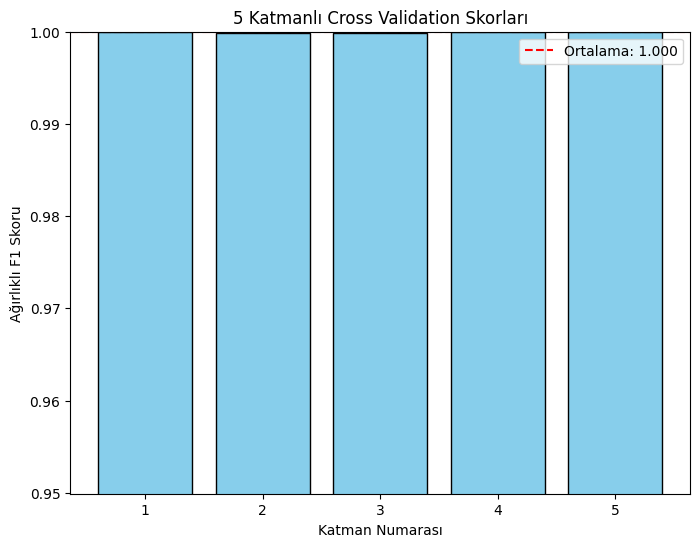

In [17]:
plt.figure(figsize=(8, 6))
plt.title("5 Katmanlı Cross Validation Skorları")
plt.bar(range(1,6), cv_scores, color = "skyblue", edgecolor = "black")
plt.xlabel("Katman Numarası")
plt.ylabel("Ağırlıklı F1 Skoru")
plt.ylim(min(cv_scores) - 0.05, 1.0)
plt.axhline(y = cv_scores.mean(), color = "r", linestyle = "--", label = f"Ortalama: {cv_scores.mean():.3f}")
plt.legend()
plt.show()

In [18]:
print("Model Tüm Eğitim Veri Seti Üzerinde Eğitiliyor...")
rf_model.fit(X_train, y_train)

print("Test Seti Üzerinde Tahmin Yapılıyor...")
y_pred = rf_model.predict(X_test)

# Metrikler
acc = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average="weighted")
f1_macro = f1_score(y_test, y_pred, average="macro")

print(f"\nNihai Model Performansları")
print(f"Accuracy Score: \t%{acc * 100:.2f}")
print(f"Weighted F1 Score: \t%{f1_weighted * 100:.2f}")
print(f"Macro F1 Score: \t%{f1_macro * 100:.2f}")

Model Tüm Eğitim Veri Seti Üzerinde Eğitiliyor...
Test Seti Üzerinde Tahmin Yapılıyor...

Nihai Model Performansları
Accuracy Score: 	%99.99
Weighted F1 Score: 	%99.99
Macro F1 Score: 	%99.99


In [19]:
print("\n--- Detaylı Sınıflandırma Raporu ---")
target_names = ['Normal (0)', 'DDoS (1)', 'PortScan (2)', 'BruteForce (3)']
print(classification_report(y_test, y_pred, target_names=target_names))


--- Detaylı Sınıflandırma Raporu ---
                precision    recall  f1-score   support

    Normal (0)       1.00      1.00      1.00     19996
      DDoS (1)       1.00      1.00      1.00     20000
  PortScan (2)       1.00      1.00      1.00     15881
BruteForce (3)       1.00      1.00      1.00     20000

      accuracy                           1.00     75877
     macro avg       1.00      1.00      1.00     75877
  weighted avg       1.00      1.00      1.00     75877



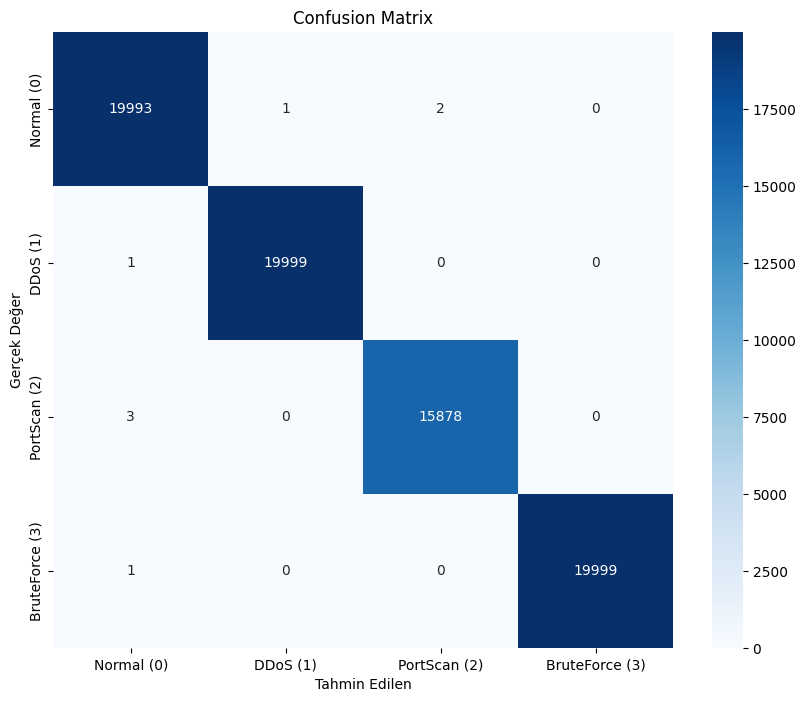

In [20]:
# Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix')
plt.show()

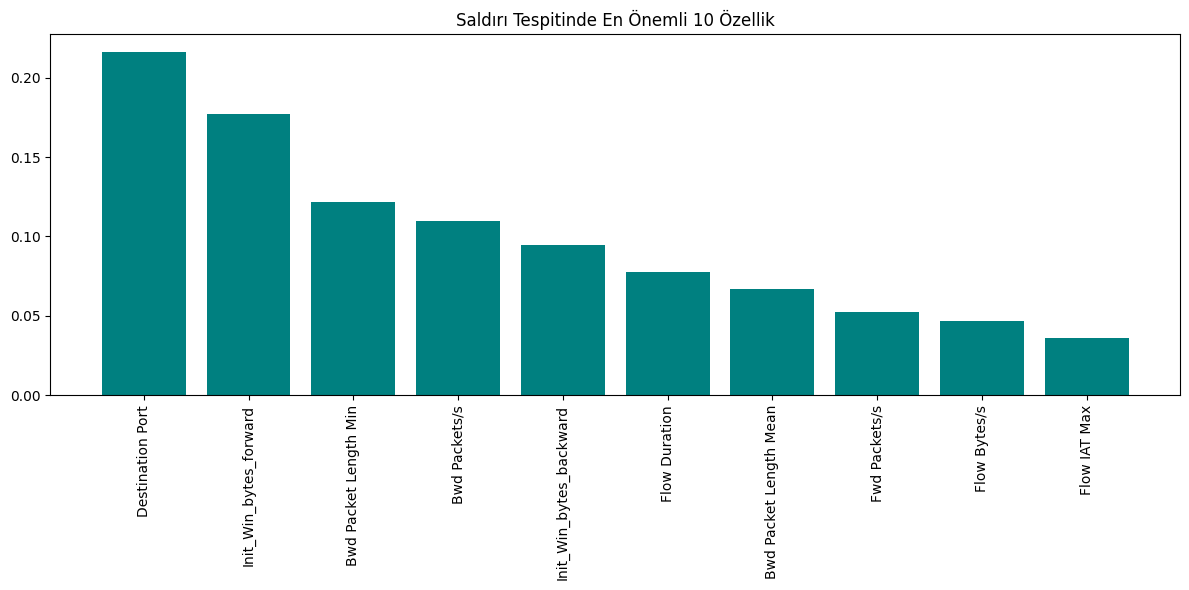

In [22]:
# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 10 

plt.figure(figsize=(12, 6))
plt.title("Saldırı Tespitinde En Önemli 10 Özellik")
plt.bar(range(top_n), importances[indices[:top_n]], align="center", color='teal')
plt.xticks(range(top_n), X.columns[indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()

In [24]:
print("\nModel kaydediliyor...")
joblib.dump(rf_model, "../models/MultiClass_Models/Model/multiclass_model_final.pkl")
joblib.dump(X.columns.tolist(), "../models/MultiClass_Models/Model/multiclass_model_columns_final.pkl")
print("Kayıt tamamlandı.")


Model kaydediliyor...
Kayıt tamamlandı.
